In [3]:
import pandas as pd

import numpy as np
from scipy.optimize import linprog

In [33]:
data = pd.read_csv('data1.csv')

In [42]:
import pandas as pd

# Load the CSV dataset, skipping the first five rows
df = pd.read_csv('data1.csv', skiprows=4)

# Transpose the dataset
df_transposed = df.transpose()

# Reset index and set the first row as column names
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:].reset_index()
df_transposed.head(25)


# Drop the first row
df = df_transposed.drop(0)

# Drop the unnamed column
df = df.drop(columns=df.columns[0])

# Reset the index
df = df.reset_index(drop=True)
df.columns = ['Month', 'Volume (units)']

#save the dataset
df.to_csv('data2.csv', index=False)

df.tail(13)


,Month,Volume (units)
47,12/31/22,"25,363"
48,1/31/23,"25,871"
49,2/28/23,"26,388"
50,3/31/23,"26,916"
51,4/30/23,"27,454"
52,5/31/23,"28,003"
53,6/30/23,"28,563"
54,7/31/23,"29,135"
55,8/31/23,"29,717"
56,9/30/23,"30,312"


In [41]:

# Load the CSV dataset
df = pd.read_csv('data2.csv')

# Convert the 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Convert the 'Volume (units)' column to numeric format
df['Volume (units)'] = df['Volume (units)'].str.replace(',', '').astype(int)

# Calculate the difference between consecutive months
df['Increase units'] = df['Volume (units)'].diff()
df.tail(30)

# Save the modified dataset
# df.to_csv('modified_dataset.csv', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_187444\2426399151.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


,Month,Volume (units),Increase units
30,2021-07-31,18114,356.0
31,2021-08-31,18476,362.0
32,2021-09-30,18845,369.0
33,2021-10-31,19222,377.0
34,2021-11-30,19607,385.0
35,2021-12-31,19999,392.0
36,2022-01-31,20399,400.0
37,2022-02-28,20807,408.0
38,2022-03-31,21223,416.0
39,2022-04-30,21647,424.0


In [43]:
def constraint_1(C):
    """
    Constraint 1: X ≤ 0.90 × C
    """
    return 0.90 * C

def constraint_2(C):
    """
    Constraint 2: Y ≤ (0.75 - 0.002) × C × 100
    """
    return (0.75 - 0.002) * C * 100

def constraint_3(C):
    """
    Constraint 3: Y ≤ 0.05 × C
    """
    return 0.05 * C

def constraint_4():
    """
    Constraint 4: X, Y ≥ 0
    This constraint doesn't depend on C.
    """
    return 0


In [50]:


def calculate_optimal_XY(C):
    """
    Calculate the optimal values of X and Y given the constraints and volume of units (C).

    Args:
    - C: Total units in each month

    Returns:
    - optimal_values: Tuple containing optimal values of X and Y
    """
    # Coefficients of the objective function (to maximize)
    c = [-25, -150]  # Negative because linprog minimizes by default

    # Coefficients of the inequality constraints
    A = [
        [1, 0],          # Constraint 1: X ≤ 0.90 × C
        [0, 1],          # Constraint 2: Y ≤ (0.75 - 0.002) × C × 100
        [0, 1],          # Constraint 3: Y ≤ 0.05 × C
        [-1, 0],         # Constraint 4: X ≥ 0
        [0, -1]          # Constraint 5: Y ≥ 0
    ]

    # Right-hand side of the inequality constraints
    b = [
        constraint_1(C),
        constraint_2(C),
        constraint_3(C),
        constraint_4(),
        constraint_4()
    ]

    # Bounds for X and Y (X, Y ≥ 0 by default)
    x_bounds = (0, None)
    y_bounds = (0, None)

    # Solve the problem
    result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])

    if result.success:
        optimal_values = result.x
        return optimal_values
    else:
        print("Optimization failed. Check constraints and input data.")
        return None

# Test the function with the given volume of units in 2023
C_values = [
    25871, 26388, 26916, 27454,
    28003, 28563, 29135, 29717, 30312,
    30918, 31536, 32167
]

for C in C_values:
    optimal_XY = calculate_optimal_XY(C)
    print(f"For C = {C}: Optimal X = {optimal_XY[0]}, Optimal Y = {optimal_XY[1]}")


For C = 25871: Optimal X = 23283.9, Optimal Y = 1293.5500000000002
For C = 26388: Optimal X = 23749.2, Optimal Y = 1319.4
For C = 26916: Optimal X = 24224.4, Optimal Y = 1345.8000000000002
For C = 27454: Optimal X = 24708.600000000002, Optimal Y = 1372.7
For C = 28003: Optimal X = 25202.7, Optimal Y = 1400.15
For C = 28563: Optimal X = 25706.7, Optimal Y = 1428.15
For C = 29135: Optimal X = 26221.5, Optimal Y = 1456.75
For C = 29717: Optimal X = 26745.3, Optimal Y = 1485.8500000000001
For C = 30312: Optimal X = 27280.8, Optimal Y = 1515.6000000000001
For C = 30918: Optimal X = 27826.2, Optimal Y = 1545.9
For C = 31536: Optimal X = 28382.4, Optimal Y = 1576.8000000000002
For C = 32167: Optimal X = 28950.3, Optimal Y = 1608.3500000000001


In [54]:
import pandas as pd

import numpy as np
from scipy.optimize import linprog

def calculate_optimal_XY(C):
    """
    Calculate the optimal values of X and Y given the constraints and volume of units (C).

    Args:
    - C: Total units in each month

    Returns:
    - optimal_values: Tuple containing optimal values of X and Y
    """
    # Coefficients of the objective function (to maximize)
    c = [-25, -150]  # Negative because linprog minimizes by default

    # Coefficients of the inequality constraints
    A = [
        [1, 0],          # Constraint 1: X ≤ 0.90 × C
        [0, 1],          # Constraint 2: Y ≤ (0.75 - 0.002) × C × 100
        [0, 1],          # Constraint 3: Y ≤ 0.05 × C
        [-1, 0],         # Constraint 4: X ≥ 0
        [0, -1]          # Constraint 5: Y ≥ 0
    ]

    # Right-hand side of the inequality constraints
    b = [
        constraint_1(C),
        constraint_2(C),
        constraint_3(C),
        constraint_4(),
        constraint_4()
    ]

    # Bounds for X and Y (X, Y ≥ 0 by default)
    x_bounds = (0, None)
    y_bounds = (0, None)

    # Solve the linear programming problem
    result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])

    if result.success:
        optimal_values = result.x
        return optimal_values
    else:
        print("Optimization failed. Check constraints and input data.")
        return None

# Test the function with the given volume of units in 2023
C_values = [
    25871, 26388, 26916, 27454,
    28003, 28563, 29135, 29717, 30312,
    30918, 31536, 32167
]

for C in C_values:
    optimal_XY = calculate_optimal_XY(C)
    print(f"For C = {C}: Optimal X = {optimal_XY[0]}, Optimal Y = {optimal_XY[1]}")

results  = []

# Iterate through each month's volume of units (C)
for i, C in enumerate(C_values):
    # Calculate the optimal values of X and Y for the current month
    optimal_XY = calculate_optimal_XY(C)
    
    # Calculate the Maximum Profit
    maximum_profit = (25 * optimal_XY[0]) + (150 * optimal_XY[1])
    
    # Append the results to the list
    results.append([i+1, optimal_XY[0], optimal_XY[1], maximum_profit])

# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=['Month', 'Upsell loan', 'Upgrade loan', 'Maximum Profit ($)'])
df_results.to_csv('maximum_profit.csv', index=False)

For C = 25871: Optimal X = 23283.9, Optimal Y = 1293.5500000000002
For C = 26388: Optimal X = 23749.2, Optimal Y = 1319.4
For C = 26916: Optimal X = 24224.4, Optimal Y = 1345.8000000000002
For C = 27454: Optimal X = 24708.600000000002, Optimal Y = 1372.7
For C = 28003: Optimal X = 25202.7, Optimal Y = 1400.15
For C = 28563: Optimal X = 25706.7, Optimal Y = 1428.15
For C = 29135: Optimal X = 26221.5, Optimal Y = 1456.75
For C = 29717: Optimal X = 26745.3, Optimal Y = 1485.8500000000001
For C = 30312: Optimal X = 27280.8, Optimal Y = 1515.6000000000001
For C = 30918: Optimal X = 27826.2, Optimal Y = 1545.9
For C = 31536: Optimal X = 28382.4, Optimal Y = 1576.8000000000002
For C = 32167: Optimal X = 28950.3, Optimal Y = 1608.3500000000001


In [55]:
df_results.head(12)

,Month,Upsell loan,Upgrade loan,Maximum Profit ($)
0,1,23283.9,1293.55,776130.0
1,2,23749.2,1319.40,791640.0
2,3,24224.4,1345.80,807480.0
3,4,24708.6,1372.70,823620.0
4,5,25202.7,1400.15,840090.0
5,6,25706.7,1428.15,856890.0
6,7,26221.5,1456.75,874050.0
7,8,26745.3,1485.85,891510.0
8,9,27280.8,1515.60,909360.0
9,10,27826.2,1545.90,927540.0


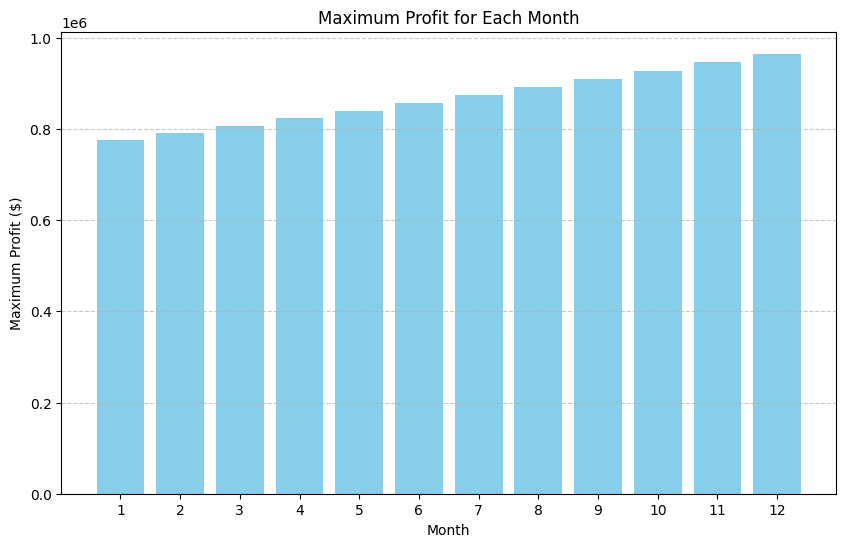

In [57]:
import matplotlib.pyplot as plt

# Plotting the Maximum Profit for each month
plt.figure(figsize=(10, 6))
plt.bar(df_results['Month'], df_results['Maximum Profit ($)'], color='skyblue')
plt.title('Maximum Profit for Each Month')
plt.xlabel('Month')
plt.ylabel('Maximum Profit ($)')
plt.xticks(df_results['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
df_results = pd.read_csv('maximum_profit.csv')

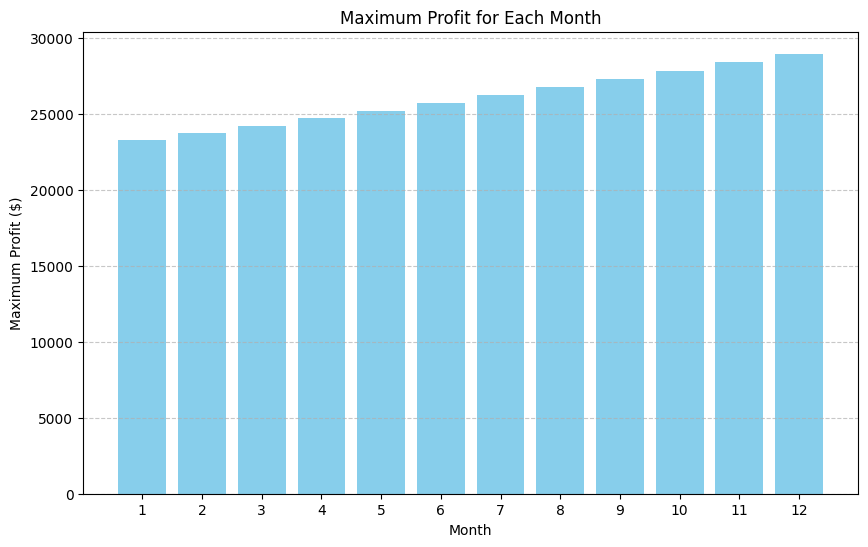

In [6]:
import matplotlib.pyplot as plt

# Plotting the Maximum Profit for each month
plt.figure(figsize=(10, 6))
plt.bar(df_results['Month'], df_results['Upsell loan'], color='skyblue')
plt.title('Maximum Upsell Loan for Each Month')
plt.xlabel('Month')
plt.ylabel('Maximum Profit ($)')
plt.xticks(df_results['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

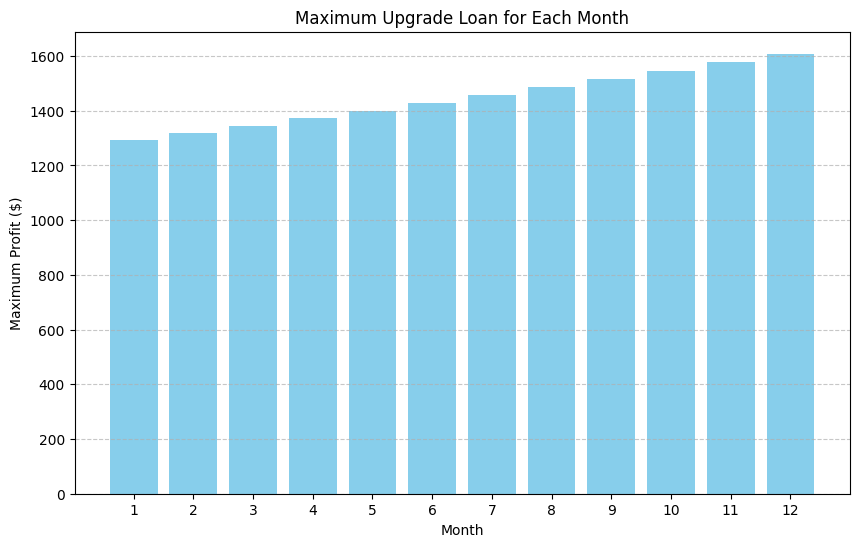

In [8]:
import matplotlib.pyplot as plt

# Plotting the Maximum Profit for each month
plt.figure(figsize=(10, 6))
plt.bar(df_results['Month'], df_results['Upgrade loan'], color='skyblue')
plt.title('Maximum Upgrade Loan for Each Month')
plt.xlabel('Month')
plt.ylabel('Maximum Profit ($)')
plt.xticks(df_results['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()